 <h1 align="center">NEURAL NETWORKS</h1>

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

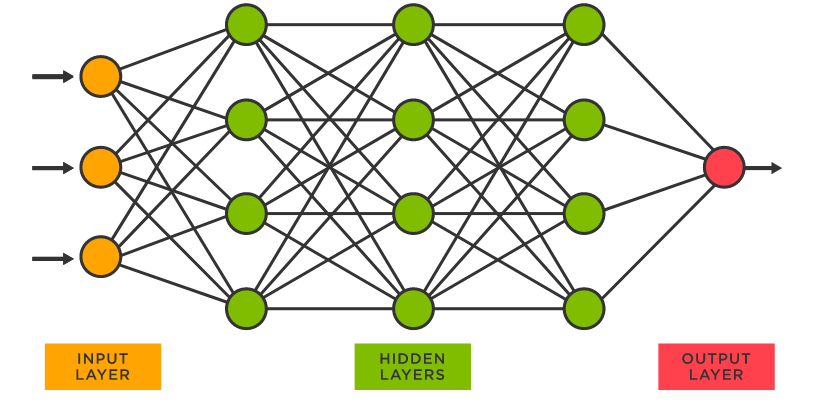

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

                                                                Source: https://www.ibm.com/cloud/learn/neural-networks

### Task

The objetive of this project is to analized the clasification using neural networks of coffee samples coming from Colombia, Guatamela y Taiwan. Sets from two countries (Colombia-Guatemala and Guatemala-Taiwan) with 2 parameters (altitude, and flavor) and 5 input parameters (Total_points, Body, Balance, Altitude, Flavor) are analyzed. Finally, the 3 countries will be analyzed together with the 5 parameters and the prediction and raining precisions, as well as the confusion matrix  will be used as an indicator of the quality of the classification. The Sklearn library will be used for the creation and testing of the neural network (8,8,8).



### Cool coffee facts! Aftertaste

A coffee’s aftertaste is largely the product of all the other sensory elements you find in each sip. When you swallow, all these elements mingle to form the thing we call aftertaste. Acidity in the aftertaste can be crisp and bright, or mellow and clean. It can cause an aftertaste to linger for ages or disappear quickly. If the coffee is under extracted, you’re drinking espresso, or it just happens to be a really acidic bean, you may feel a light burn that travels down your throat. 
Sweetness is a great thing to find in the aftertaste. A coffee that goes down with a pleasant sweetness is probably going to leave a hint of that sweetness there for you to enjoy for a while. Think of how your throat feels sweet and clean after a bite of fresh cake. Bitterness is rarely something you want to experience in your coffee’s aftertaste. More often than not, it’s harsh and biting. It can even create a slight scratchy feeling as you swallow. Generally, a highly bitter aftertaste is the result of over roasting or over extraction.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

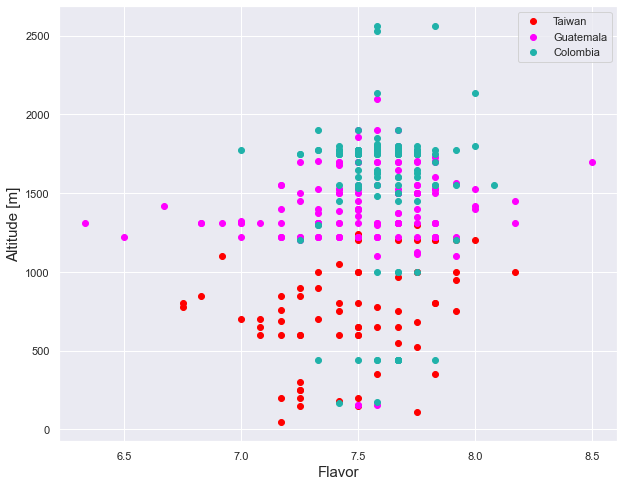

In [382]:
# Set theme for plotting
sns.set_theme()

# Import the data
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)

# Plot the data
countries = ["Taiwan", "Guatemala","Colombia"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax.scatter(temp_df.Flavor,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax.set_xlabel("Flavor", fontsize = 15)
ax.set_ylabel("Altitude [m]", fontsize = 15)
ax.legend()
plt.show()

As mentioned before, these three countries (Colombia, Guatemala, Taiwan) represent 3 types of high quality coffees with different environmental conditions, but with similar cup quality values. Classification is a complex task and we will analyze the results using an 8,8,8 layer neural network.

### Guatemala Colombia 

#### Five elements 

In [106]:
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X1 = cafe_filter[['Total_points', 'Body', 'Balance', 'Flavor',
       'altitude_mean_meters']]
y1 = cafe_filter['Country']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)

In [124]:
mlp1 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp1.fit(X1_train,y1_train)
predict_train1 = mlp1.predict(X1_train)
predict_test1 = mlp1.predict(X1_test)
print ("Train - Accuracy :", metrics.accuracy_score(y1_train, predict_train1))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test, predict_test1))
print(classification_report(y1_test,predict_test1))

Train - Accuracy : 0.7905759162303665
Test - Accuracy : 0.7926829268292683
              precision    recall  f1-score   support

    Colombia       0.82      0.77      0.80        43
   Guatemala       0.76      0.82      0.79        39

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



Text(0.5, 1.0, 'Confusion matrix for Neural Networks (Colombia-Guatemala) 5 elements')

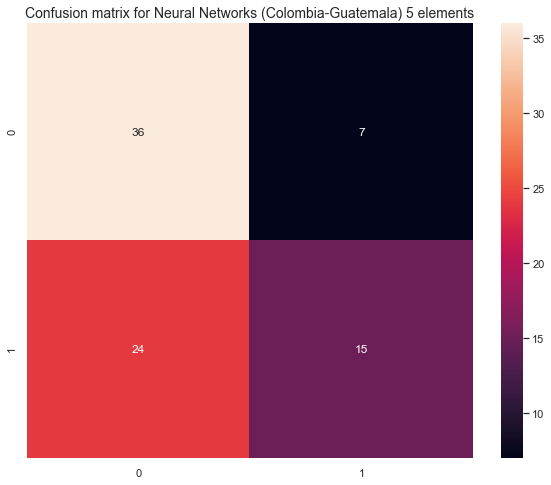

In [105]:
fig = plt.figure(figsize = (10,8))
cm1 = confusion_matrix(y1_test, predict_test1)
sns.heatmap(cm1,annot=True,fmt='g')
plt.title('Confusion matrix for Neural Networks (Colombia-Guatemala) 5 elements',fontsize=14)

#### Guatemala-Colombia Using 2 elements

In [343]:
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X2 = cafe_filter[['Flavor','altitude_mean_meters']]
y2 = cafe_filter['Country']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

In [371]:
mlp2 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp2.fit(X2_train,y2_train)
predict_train2 = mlp2.predict(X2_train)
predict_test2 = mlp2.predict(X2_test)
print ("Train - Accuracy :", metrics.accuracy_score(y2_train, predict_train2))
print ("Test - Accuracy :", metrics.accuracy_score(y2_test, predict_test2))
print(classification_report(y2_test,predict_test2))

Train - Accuracy : 0.6020942408376964
Test - Accuracy : 0.5121951219512195
              precision    recall  f1-score   support

    Colombia       0.71      0.12      0.20        43
   Guatemala       0.49      0.95      0.65        39

    accuracy                           0.51        82
   macro avg       0.60      0.53      0.42        82
weighted avg       0.61      0.51      0.41        82



Text(0.5, 1.0, 'Confusion matrix for Neural Networks (Colombia-Guatemala) 2 elements')

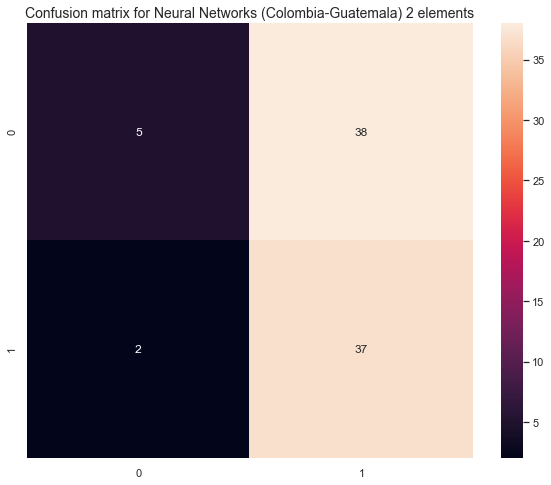

In [372]:
fig = plt.figure(figsize = (10,8))
cm2 = confusion_matrix(y2_test, predict_test2)
sns.heatmap(cm2,annot=True,fmt='g')
plt.title('Confusion matrix for Neural Networks (Colombia-Guatemala) 2 elements',fontsize=14)

Several tests were performed in which the result of the accuracy in the classification varied, getting values from 20% to a maximum of 80% for the 5 elements, and from 10% to 70% for the classifier with 3 parameters. This fluctuation is due to the random selection of the training and test data values. If we use the maximum value obtained we have 80% for 5 elements and 70% for 2 elements using neural networks, although the average result could be lower.

### Guatemala- Taiwan


#### Five elements

In [163]:
values=['Guatemala','Taiwan']
cafe_filter= cafe[cafe.Country.isin(values)]
X3 = cafe_filter[['Total_points', 'Body', 'Balance', 'Flavor',
       'altitude_mean_meters']]
y3 = cafe_filter['Country']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,random_state=42)

In [193]:
mlp3 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp3.fit(X3_train,y3_train)
predict_train3 = mlp3.predict(X3_train)
predict_test3 = mlp3.predict(X3_test)
print ("Train - Accuracy :", metrics.accuracy_score(y3_train, predict_train3))
print ("Test - Accuracy :", metrics.accuracy_score(y3_test, predict_test3))
print(classification_report(y3_test,predict_test3))

Train - Accuracy : 0.8933333333333333
Test - Accuracy : 0.8923076923076924
              precision    recall  f1-score   support

   Guatemala       0.86      1.00      0.92        43
      Taiwan       1.00      0.68      0.81        22

    accuracy                           0.89        65
   macro avg       0.93      0.84      0.87        65
weighted avg       0.91      0.89      0.89        65



Text(0.5, 1.0, 'Confusion matrix for Neural Networks (Guatemala-Taiwan) 5 elements')

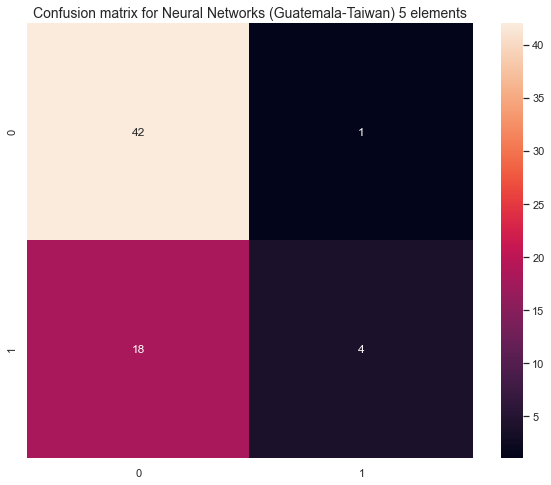

In [103]:
fig = plt.figure(figsize = (10,8))
cm3 = confusion_matrix(y3_test, predict_test3)
sns.heatmap(cm3,annot=True,fmt='g')
plt.title('Confusion matrix for Neural Networks (Guatemala-Taiwan) 5 elements',fontsize=14)

#### Guatemala-Taiwan Using 2 elements

In [373]:
values=['Guatemala','Taiwan']
cafe_filter= cafe[cafe.Country.isin(values)]
X4 = cafe_filter[['Flavor', 'altitude_mean_meters']]
y4 = cafe_filter['Country']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2,random_state=42)

In [380]:
mlp4 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp4.fit(X4_train,y4_train)
predict_train4 = mlp4.predict(X4_train)
predict_test4 = mlp4.predict(X4_test)
print ("Train - Accuracy :", metrics.accuracy_score(y4_train, predict_train4))
print ("Test - Accuracy :", metrics.accuracy_score(y4_test, predict_test4))
print(classification_report(y4_test,predict_test4))

Train - Accuracy : 0.6976744186046512
Test - Accuracy : 0.6511627906976745
              precision    recall  f1-score   support

   Guatemala       0.65      0.96      0.78        27
      Taiwan       0.67      0.12      0.21        16

    accuracy                           0.65        43
   macro avg       0.66      0.54      0.49        43
weighted avg       0.66      0.65      0.57        43



Text(0.5, 1.0, 'Confusion matrix for Neural Networks (Guatemala-Taiwan) 2 elements')

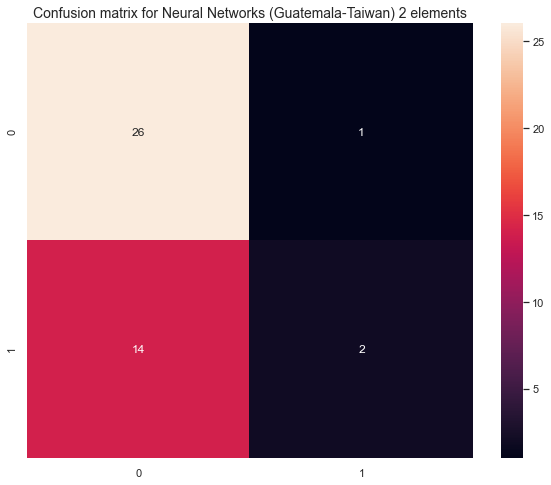

In [381]:
fig = plt.figure(figsize = (10,8))
cm4 = confusion_matrix(y4_test, predict_test4)
sns.heatmap(cm4,annot=True,fmt='g')
plt.title('Confusion matrix for Neural Networks (Guatemala-Taiwan) 2 elements',fontsize=14)

Several tests were performed for Guatemala-Taiwan, in which the result of the accuracy in the classification varied, getting values from 25% to a maximum of 95% for the 5 elements, and from 30% to 93% for the classifier with 3 parameters. This fluctuation is due to the random selection of the training and test data values. If we use the maximum value obtained we have 95% for 5 elements and 93% for 2 elements using neural networks, although the average result could be lower. This eaiser clasification task fits better for neural networks algorithm. 

### Colombia-Guatemala-Taiwan 

In [265]:
values=['Guatemala','Taiwan', 'Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X5 = cafe_filter[['Total_points', 'Body', 'Balance', 'Flavor',
       'altitude_mean_meters']]
y5 = cafe_filter['Country']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3,random_state=42)

In [340]:
mlp5 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp5.fit(X5_train,y5_train)
predict_train5 = mlp5.predict(X5_train)
predict_test5 = mlp5.predict(X5_test)
print ("Train - Accuracy :", metrics.accuracy_score(y5_train, predict_train5))
print ("Test - Accuracy :", metrics.accuracy_score(y5_test, predict_test5))
print(classification_report(y5_test,predict_test5))

Train - Accuracy : 0.680672268907563
Test - Accuracy : 0.6699029126213593
              precision    recall  f1-score   support

    Colombia       0.69      0.26      0.38        34
   Guatemala       0.67      0.94      0.78        54
      Taiwan       0.64      0.60      0.62        15

    accuracy                           0.67       103
   macro avg       0.67      0.60      0.60       103
weighted avg       0.67      0.67      0.63       103



Text(0.5, 1.0, 'Confusion matrix for Neural Network, 5 elements, three countries')

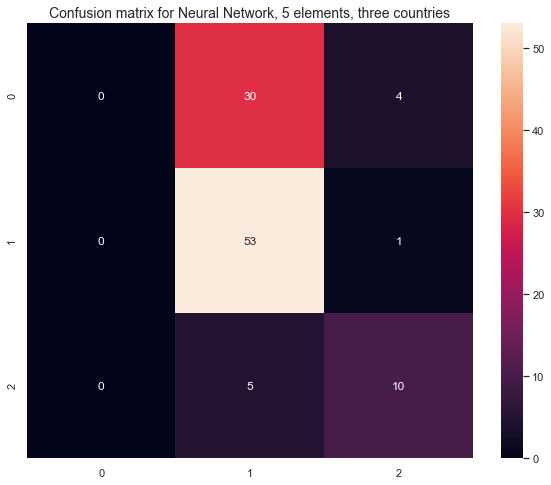

In [101]:
fig = plt.figure(figsize = (10,8))
cm5 = confusion_matrix(y5_test, predict_test5)
sns.heatmap(cm5,annot=True,fmt='g')
plt.title('Confusion matrix for Neural Network, 5 elements, three countries',fontsize=14)

For this case, the 5 parameters clasifier was teste several time . The result of the accuracy in the classification varied, getting values from 15% to a maximum of 75%. This more complicated clasification task was harder for neural networks algorithm. 